In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask=None)

In [5]:
dtfa = DTFA.DeepTFA(lepping_db.all(), mask=None, num_factors=100, embedding_dim=2)

01/11/2019 18:37:56 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-mdd07/func/sub-mdd07_task-nonmusic_run-5_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/11/2019 18:37:58 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-mdd07/func/sub-mdd07_task-music_run-2_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/11/2019 18:38:00 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-mdd07/func/sub-mdd07_task-nonmusic_run-4_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/11/2019 18:38:02 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-mdd07/func/sub-mdd07_task-music

In [6]:
dtfa.normalize_activations()

[tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492),
 tensor(7.9492

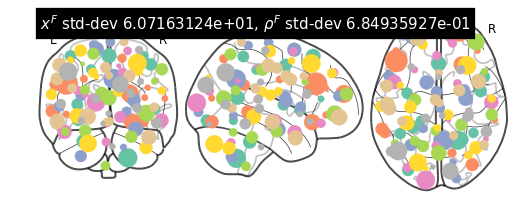

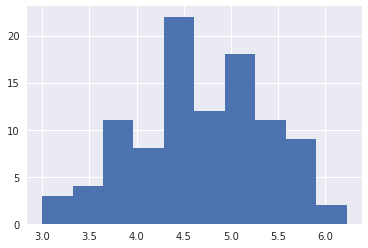

(<nilearn.plotting.displays.OrthoProjector at 0x7fa2b431c470>,
 tensor([[-31.5698, -85.5343, -10.9509],
         [ 48.4796,  12.3791,   0.5167],
         [ -0.9623,  34.6136,  11.8091],
         [-18.1531, -33.4538,  42.4301],
         [ 20.5103, -54.3171, -50.7318],
         [ 37.1772, -46.6248,  56.1183],
         [-26.4703, -40.3917, -33.4679],
         [  0.6541,  26.2978,  56.6339],
         [-32.6609,  -4.8707,   5.6257],
         [ 24.3311, -53.4335,  13.2295],
         [ 19.4406, -57.5689, -10.9303],
         [ 44.6970,  -2.5182,  47.4253],
         [-39.8225, -47.2335,  56.4186],
         [ 14.5356, -67.7209,  54.0362],
         [-25.6075,  -8.8537,  32.2580],
         [-44.2768,  39.8072,  -5.0432],
         [ 22.5618,  58.8530,  17.0615],
         [ 38.2922, -80.3979,  12.5295],
         [ 41.4031,  39.8856,  23.0424],
         [-59.0428, -42.5156,  -1.7213],
         [ 24.8634,  25.2988, -12.5992],
         [-44.0367,  29.2471,  27.6391],
         [ 35.8519, -79.9356, -12.2

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=1000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=50, blocks_batch_size=8, patience=100)

01/11/2019 18:44:42 [Epoch 1] (35304ms) Posterior free-energy 1.36890624e+09 = KL from prior 5.81404053e+03 - log-likelihood -1.36890035e+09
01/11/2019 18:44:42 Saving checkpoint...
01/11/2019 18:45:17 [Epoch 2] (35257ms) Posterior free-energy 1.27025958e+09 = KL from prior 1.18919150e+04 - log-likelihood -1.27024730e+09
01/11/2019 18:45:52 [Epoch 3] (34642ms) Posterior free-energy 1.21886259e+09 = KL from prior 2.20376113e+04 - log-likelihood -1.21884045e+09
01/11/2019 18:46:26 [Epoch 4] (34588ms) Posterior free-energy 1.19163469e+09 = KL from prior 3.21324121e+04 - log-likelihood -1.19160256e+09
01/11/2019 18:47:01 [Epoch 5] (34408ms) Posterior free-energy 1.17590093e+09 = KL from prior 4.20996172e+04 - log-likelihood -1.17585856e+09
01/11/2019 18:47:35 [Epoch 6] (34443ms) Posterior free-energy 1.16589402e+09 = KL from prior 5.40477070e+04 - log-likelihood -1.16583974e+09
01/11/2019 18:48:10 [Epoch 7] (34666ms) Posterior free-energy 1.15811341e+09 = KL from prior 6.58657812e+04 - log

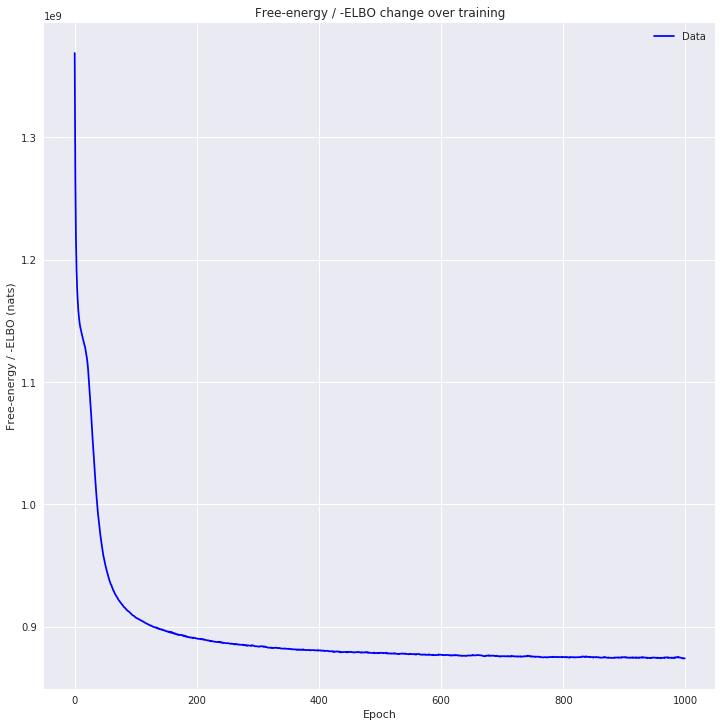

In [9]:
utils.plot_losses(losses)

In [10]:
def task_labeler(b):
    return b.task

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


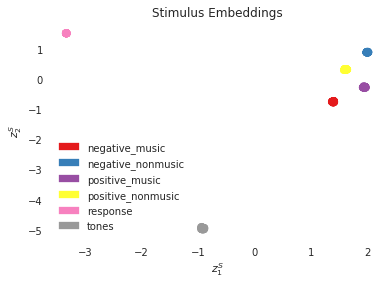

In [11]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [12]:
def subject_labeler(block):
    return 'Subject %d' % block.subject

def subject_run_labeler(block):
    return 'sub%drun%d' % (block.subject, block.run)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


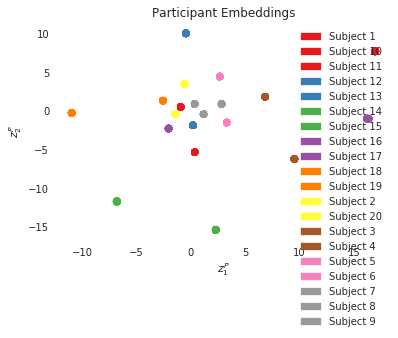

In [13]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

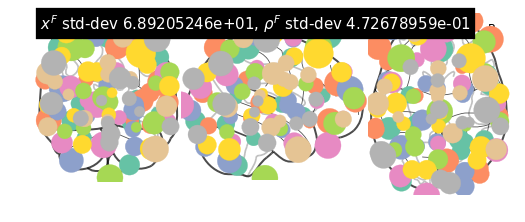

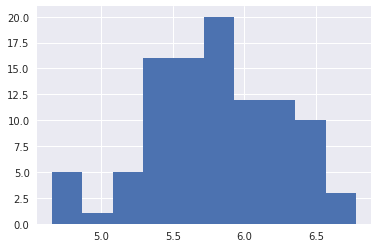

(<nilearn.plotting.displays.OrthoProjector at 0x7fa2a4a5f668>,
 tensor([[-3.8492e+01, -9.7364e+01, -1.1489e+01],
         [ 5.2838e+01,  1.6066e+01, -5.3014e+00],
         [-2.7957e+00,  3.6777e+01,  1.5220e+01],
         [-2.1568e+01, -3.1100e+01,  3.8878e+01],
         [ 2.2280e+01, -5.3487e+01, -5.8163e+01],
         [ 4.8491e+01, -5.3658e+01,  5.8723e+01],
         [-2.5332e+01, -3.6317e+01, -2.9781e+01],
         [ 1.1005e+00,  4.2103e+01,  7.9240e+01],
         [-3.0418e+01, -6.4809e+00,  6.3300e+00],
         [ 2.9801e+01, -5.5203e+01,  1.3374e+01],
         [ 2.4131e+01, -6.5483e+01, -1.4219e+01],
         [ 5.3883e+01,  3.2988e+00,  5.5187e+01],
         [-5.1559e+01, -4.1862e+01,  6.5331e+01],
         [ 9.2138e+00, -7.5833e+01,  6.5782e+01],
         [-2.3388e+01, -7.3992e+00,  3.1620e+01],
         [-6.2708e+01,  4.3650e+01, -1.1450e+01],
         [ 3.5653e+01,  7.0824e+01,  9.4353e+00],
         [ 4.3685e+01, -8.9722e+01,  1.7818e+01],
         [ 5.4960e+01,  5.2018e+01,  

In [14]:
dtfa.visualize_factor_embedding()

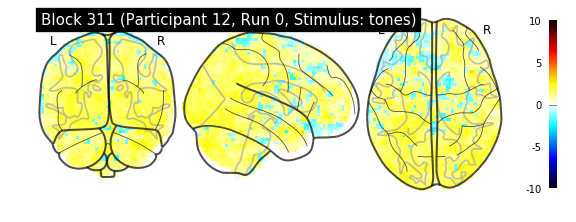

01/12/2019 03:58:26 Reconstruction Error (Frobenius Norm): 4.59248230e+02 out of 6.07053101e+02


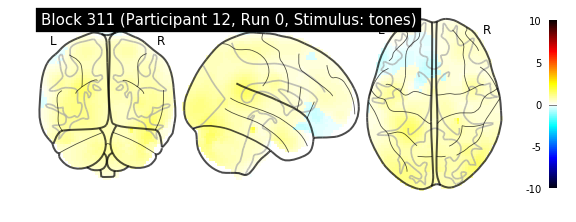

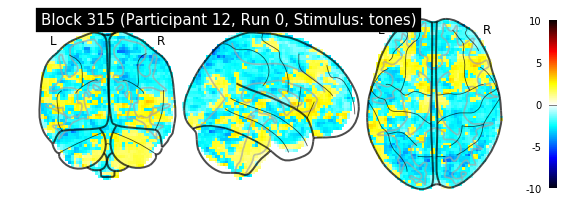

01/12/2019 03:58:28 Reconstruction Error (Frobenius Norm): 6.26841064e+02 out of 9.66917847e+02


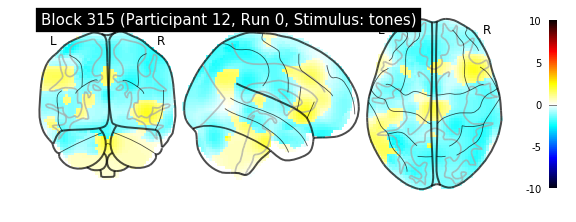

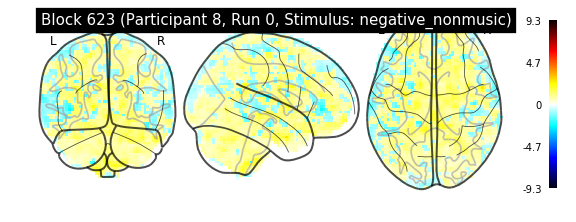

01/12/2019 03:58:30 Reconstruction Error (Frobenius Norm): 3.51585144e+02 out of 4.52274017e+02


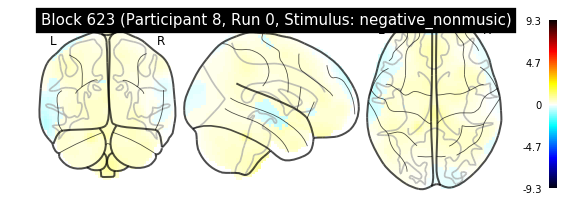

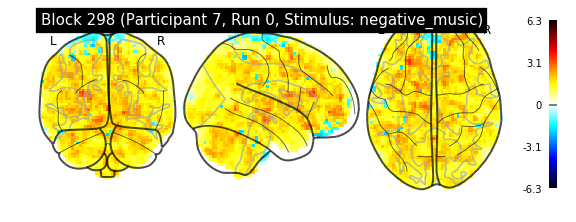

01/12/2019 03:58:32 Reconstruction Error (Frobenius Norm): 5.09398010e+02 out of 8.83330627e+02


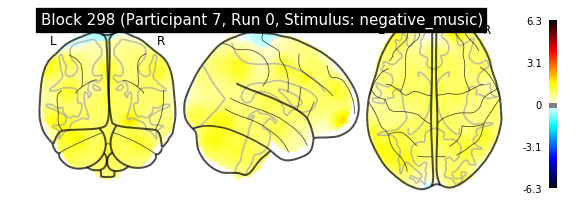

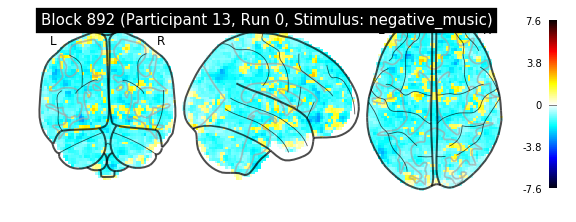

01/12/2019 03:58:35 Reconstruction Error (Frobenius Norm): 4.95948212e+02 out of 5.45284546e+02


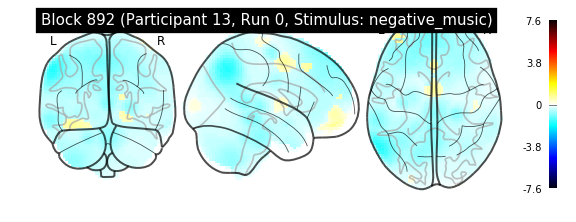

In [15]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)

In [16]:
dtfa.average_reconstruction_error()

01/12/2019 04:00:44 Average reconstruction error (MSE): 6.74900036e-01
01/12/2019 04:00:44 Average data norm (Euclidean): 9.55792772e-01
01/12/2019 04:00:44 Percent average reconstruction error: 0.275088


(0.6749000363185995, 0.9557927715365993, 0.0027508778265522664)